Precisión media en la validación cruzada: 0.9949579831932773
Precisión en el conjunto de prueba: 0.9915966386554622


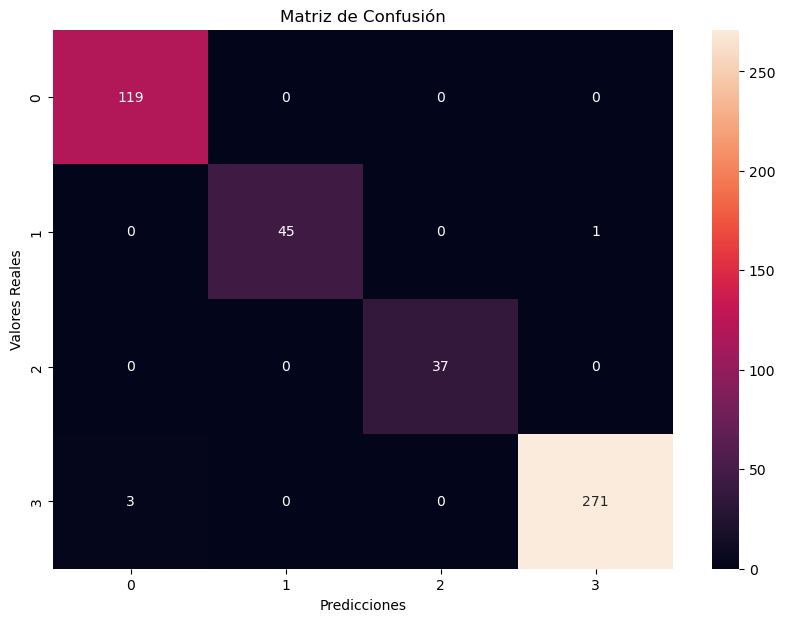

              precision    recall  f1-score   support

       heavy       0.98      1.00      0.99       119
        high       1.00      0.98      0.99        46
         low       1.00      1.00      1.00        37
      normal       1.00      0.99      0.99       274

    accuracy                           0.99       476
   macro avg       0.99      0.99      0.99       476
weighted avg       0.99      0.99      0.99       476



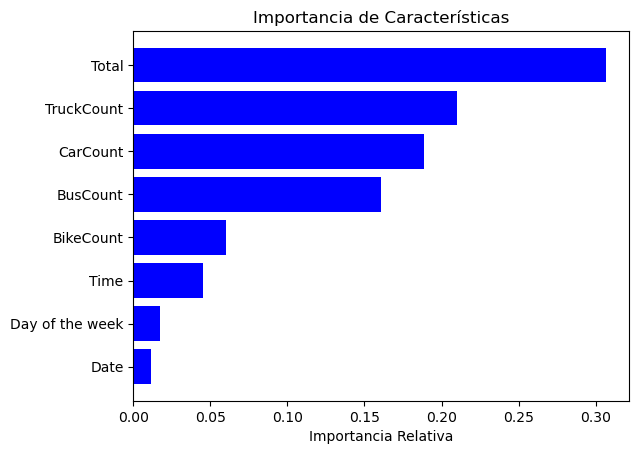

          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0   1:00:00 AM     4        Saturday        15          5         0   
1   8:30:00 PM     8       Wednesday        86         15        15   
2   9:45:00 PM     7         Tuesday       102          5        19   
3   6:45:00 AM    15          Sunday       109         14        38   
4  12:15:00 AM    29          Sunday        14          2         1   

   TruckCount  Total Predicted Traffic Situation  
0          10     30                         low  
1          23    139                        high  
2          11    137                      normal  
3           1    162                        high  
4          26     43                      normal  


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Función para convertir la columna de tiempo a horas del día
def convert_time_to_hour(data):
    return data['Time'].apply(lambda x: datetime.strptime(x, '%I:%M:%S %p').hour)

# Función para codificar variables categóricas
def encode_categorical(data, column):
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])
    return data, encoder

# Carga de los datos de entrenamiento
train_data_original = pd.read_csv('C:\\KOPURU\\DATOS\\train\\train_datos-trafico.csv')
train_data = train_data_original.copy()

# Preprocesamiento de los datos de entrenamiento
train_data['Time'] = convert_time_to_hour(train_data)
train_data, day_encoder = encode_categorical(train_data, 'Day of the week')

# Escalado de datos numéricos
scaler = StandardScaler()
numerical_columns = ['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

# Separación de características y etiquetas
X = train_data.drop('Traffic Situation', axis=1)
y = train_data['Traffic Situation']

# Validación cruzada
modelo_rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(modelo_rf, X, y, cv=5)
print("Precisión media en la validación cruzada:", scores.mean())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de bosque aleatorio
modelo_rf.fit(X_train, y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred_test = modelo_rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Precisión en el conjunto de prueba:", accuracy_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# Informe de clasificación
report = classification_report(y_test, y_pred_test)
print(report)

# Importancia de características
importances = modelo_rf.feature_importances_
indices = np.argsort(importances)
plt.title('Importancia de Características')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

# Carga de los datos de prueba
test_data_original = pd.read_csv('C:\\KOPURU\\DATOS\\TEST\\test_datos-trafico.csv')
test_data = test_data_original.copy()

# Preprocesamiento de los datos de prueba
test_data['Time'] = convert_time_to_hour(test_data)
test_data['Day of the week'] = day_encoder.transform(test_data['Day of the week'])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

# Realización de predicciones en el conjunto de prueba
X_test = test_data.drop('Traffic Situation', axis=1, errors='ignore')
y_pred_test = modelo_rf.predict(X_test)

# Añadir el resultado de las predicciones al DataFrame de prueba
test_data_original['Predicted Traffic Situation'] = y_pred_test

# Guardado de los resultados
output_path = 'C:\\KOPURU\\SALIDA\\Resultados_Xabier_Garitano.csv'
test_data_original.to_csv(output_path, index=False)

# Visualizar parte del DataFrame de prueba con las predicciones
print(test_data_original.head())


                                       CarCount  BikeCount   BusCount  \
Day of the week Hour                                                    
Monday          1900-01-01 00:00:00   14.500000   2.696429   0.500000   
                1900-01-01 04:00:00  103.404762  17.738095  21.452381   
                1900-01-01 08:00:00   73.320755  13.396226  22.264151   
                1900-01-01 12:00:00   56.700000  14.780000  17.100000   
                1900-01-01 16:00:00  112.500000  22.192308  29.442308   
                1900-01-01 20:00:00   45.703704   8.888889   7.574074   
Tuesday         1900-01-01 00:00:00   24.661290   2.758065   2.580645   
                1900-01-01 04:00:00  100.737705  19.819672  20.213115   
                1900-01-01 08:00:00   71.089552  15.656716  21.208955   
                1900-01-01 12:00:00   62.426230  15.459016  18.377049   
                1900-01-01 16:00:00  110.746032  21.301587  28.873016   
                1900-01-01 20:00:00   47.515152   7

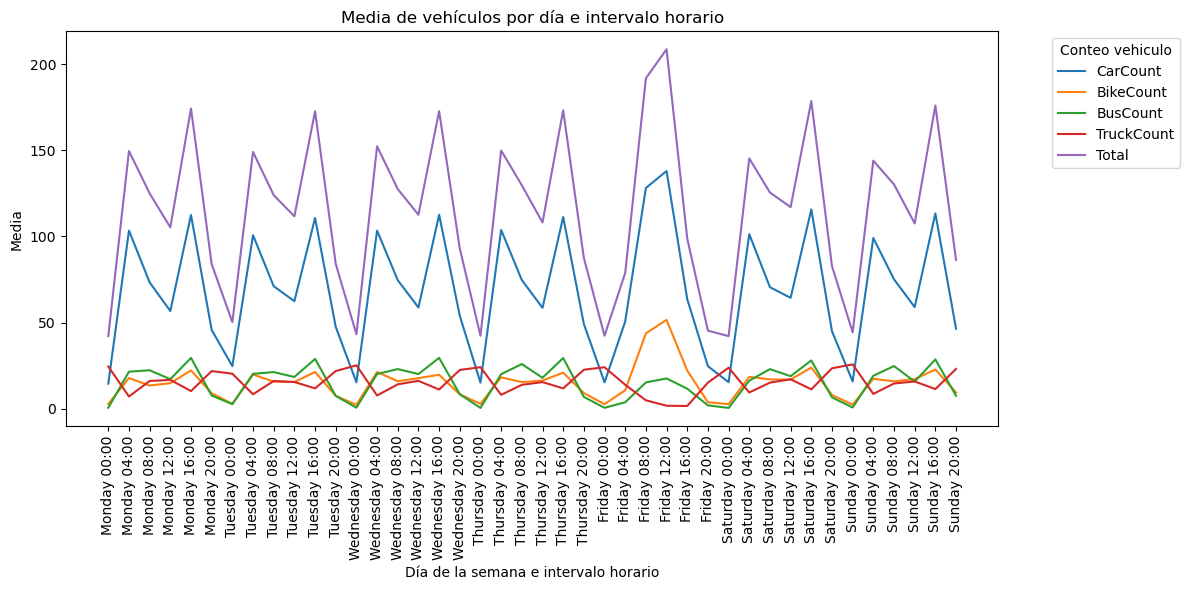

In [26]:
# Datos de entrada
data = train_data_original.copy()

# Crear un DataFrame a partir de los datos
df = pd.DataFrame(data, columns=["Time", "Day of the week", "CarCount", "BikeCount", "BusCount", "TruckCount", "Total", "Traffic Situation"])

# Convertir la columna "Time" a formato de hora
df["Time"] = pd.to_datetime(df["Time"], format='%I:%M:%S %p')

# Agrupar los datos por día de la semana y por intervalo de 4 horas
df["Day of the week"] = pd.Categorical(df["Day of the week"], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
df["Hour"] = df["Time"].dt.floor('4H')
grouped = df.groupby(["Day of the week", "Hour"]).mean()
grouped_situation = df.groupby(["Day of the week", "Hour", "Traffic Situation"]).size().reset_index(name='Count')


print (grouped)
print (grouped_situation)

# Crear la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

for vehicle_type in ["CarCount", "BikeCount", "BusCount", "TruckCount", "Total"]:
    ax.plot(grouped.index.get_level_values("Day of the week").astype(str) + ' ' + grouped.index.get_level_values("Hour").strftime('%H:%M'),
            grouped[vehicle_type], label=vehicle_type)

ax.set_xlabel("Día de la semana e intervalo horario")
ax.set_ylabel("Media")
ax.set_title("Media de vehículos por día e intervalo horario")
ax.legend(title="Conteo vehiculo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


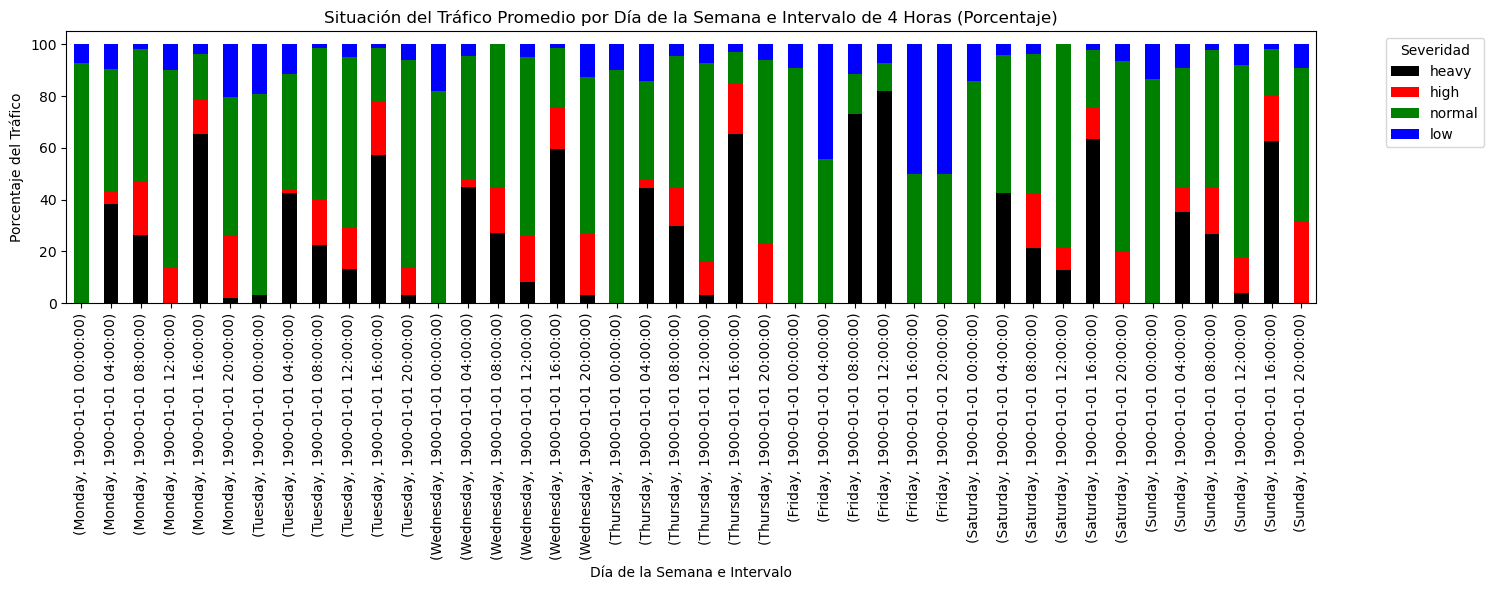

In [27]:
pivot_data = grouped_situation.pivot(index=['Day of the week','Hour'], columns='Traffic Situation', values='Count')

# Reemplazar los valores en pivot_data con porcentajes
pivot_data_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Definir colores para cada nivel de severidad
colors = {'low': 'blue', 'normal': 'green', 'high': 'red', 'heavy': 'black'}

# Definir el orden deseado de las columnas (severidad)
desired_order = ['heavy', 'high', 'normal', 'low']

# Reorganizar las columnas en el orden deseado
pivot_data_percentage = pivot_data_percentage[desired_order]

# Crear un gráfico de barras apiladas con colores personalizados
plt.figure(figsize=(15, 6))
pivot_data_percentage.plot(kind='bar', stacked=True, ax=plt.gca(), color=[colors[col] for col in pivot_data_percentage.columns])

plt.title("Situación del Tráfico Promedio por Día de la Semana e Intervalo de 4 Horas (Porcentaje)")
plt.xlabel("Día de la Semana e Intervalo")
plt.ylabel("Porcentaje del Tráfico")
plt.xticks(rotation=90)
plt.legend(title="Severidad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

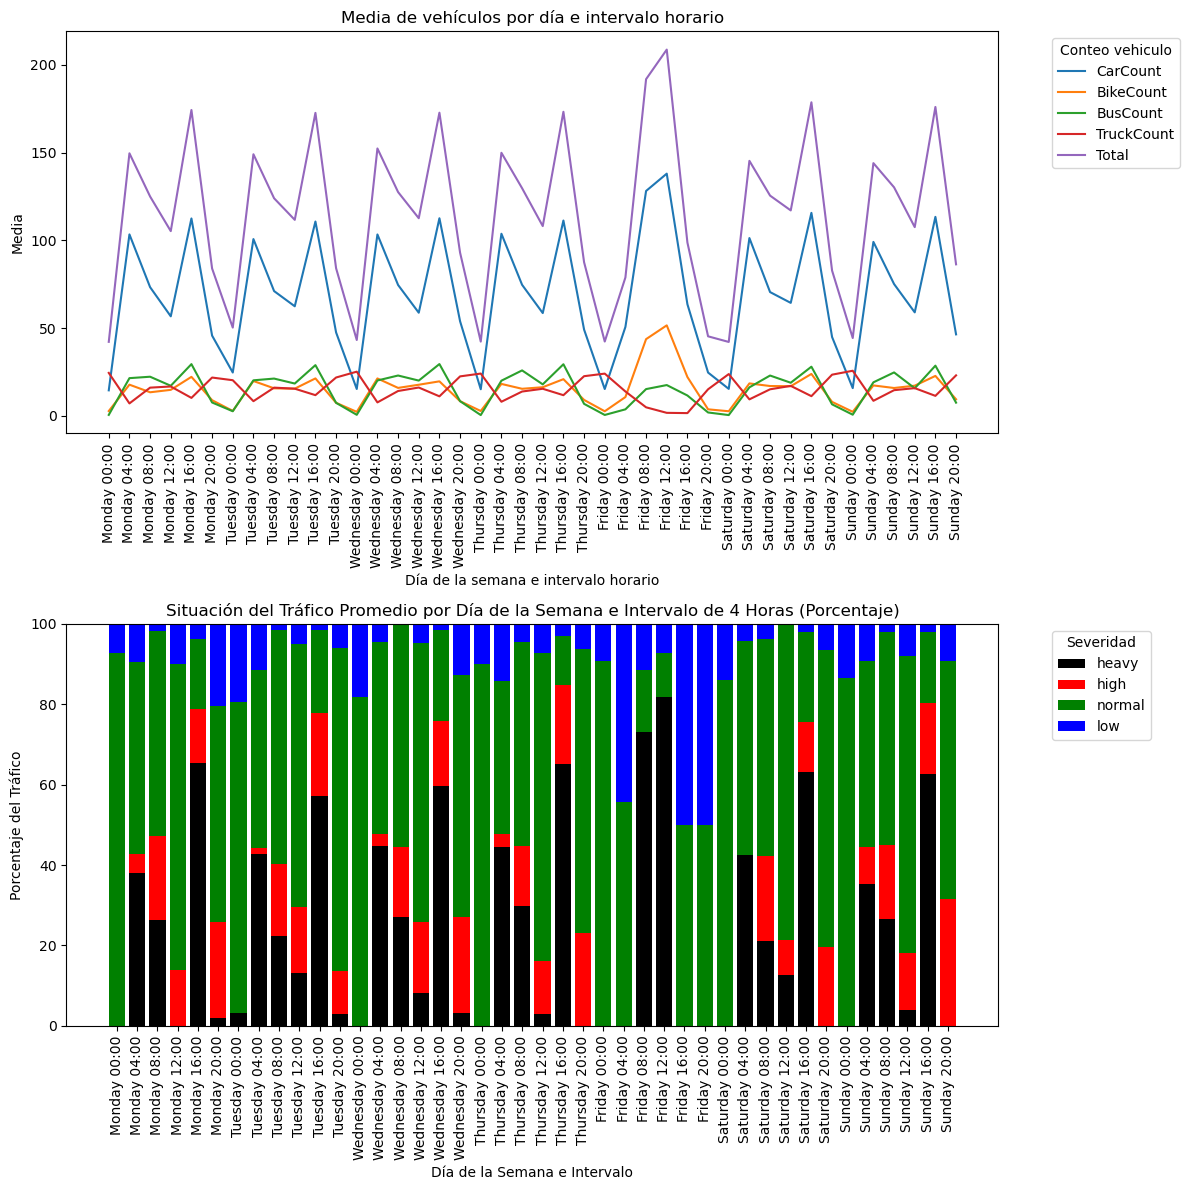

In [28]:
# Datos de entrada
data = train_data_original.copy()

# Crear un DataFrame a partir de los datos
df = pd.DataFrame(data, columns=["Time", "Day of the week", "CarCount", "BikeCount", "BusCount", "TruckCount", "Total", "Traffic Situation"])

# Convertir la columna "Time" a formato de hora
df["Time"] = pd.to_datetime(df["Time"], format='%I:%M:%S %p')

# Agrupar los datos por día de la semana y por intervalo de 4 horas
df["Day of the week"] = pd.Categorical(df["Day of the week"], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
df["Hour"] = df["Time"].dt.floor('4H')
grouped = df.groupby(["Day of the week", "Hour"]).mean()
grouped_situation = df.groupby(["Day of the week", "Hour", "Traffic Situation"]).size().reset_index(name='Count')

# Crear la gráfica combinada
fig, axs = plt.subplots(2, 1, figsize=(12, 12))  # Crear un subplot con 2 filas y 1 columna

# Primer gráfico (media de vehículos por día e intervalo horario)
for vehicle_type in ["CarCount", "BikeCount", "BusCount", "TruckCount", "Total"]:
    axs[0].plot(grouped.index.get_level_values("Day of the week").astype(str) + ' ' + grouped.index.get_level_values("Hour").strftime('%H:%M'),
                grouped[vehicle_type], label=vehicle_type)

axs[0].set_xlabel("Día de la semana e intervalo horario")
axs[0].set_ylabel("Media")
axs[0].set_title("Media de vehículos por día e intervalo horario")
axs[0].legend(title="Conteo vehiculo", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].tick_params(axis='x', rotation=90)

# Segundo gráfico (gráfico de barras apiladas)
pivot_data = grouped_situation.pivot(index=['Day of the week', 'Hour'], columns='Traffic Situation', values='Count')
pivot_data_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100
colors = {'low': 'blue', 'normal': 'green', 'high': 'red', 'heavy': 'black'}
desired_order = ['heavy', 'high', 'normal', 'low']

pivot_data_percentage = pivot_data_percentage[desired_order]

for col in pivot_data_percentage.columns:
    axs[1].bar(pivot_data_percentage.index.map(lambda x: f"{x[0]} {x[1].strftime('%H:%M')}"), pivot_data_percentage[col],
              bottom=pivot_data_percentage[desired_order[:desired_order.index(col)]].sum(axis=1), label=col, color=colors[col])

axs[1].set_title("Situación del Tráfico Promedio por Día de la Semana e Intervalo de 4 Horas (Porcentaje)")
axs[1].set_xlabel("Día de la Semana e Intervalo")
axs[1].set_ylabel("Porcentaje del Tráfico")
axs[1].tick_params(axis='x', rotation=90)
axs[1].legend(title="Severidad", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [29]:
# Crear un DataFrame a partir de los datos
df = pd.DataFrame(train_data_original, columns=["Time", "Day of the week", "CarCount", "BikeCount", "BusCount", "TruckCount", "Traffic Situation"])

# Convertir la columna "Time" a formato de hora
df["Time"] = pd.to_datetime(df["Time"], format='%I:%M:%S %p')

# Agrupar los datos por día de la semana y por intervalo de 4 horas
df["Day of the week"] = pd.Categorical(df["Day of the week"], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
df["Hour"] = df["Time"].dt.floor('4H')
grouped = df.groupby(["Day of the week", "Hour"]).mean()
grouped_situation = df.groupby(["Day of the week", "Hour", "Traffic Situation"]).size().reset_index(name='Count')

print (grouped)
print (grouped_situation)

# Crear un gráfico combinado con dos escalas (izquierda y derecha)
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Definir colores para las barras de situación de tráfico
colors = {'low': 'blue', 'normal': 'green', 'high': 'red', 'heavy': 'black'}

# Definir colores para las líneas de conteo de vehículos
line_colors = {
    'CarCount': 'cyan',  # Color para CarCount
    'BikeCount': 'magenta',  # Color para BikeCount
    'BusCount': 'orange',  # Color para BusCount
    'TruckCount': 'brown',  # Color para TruckCount
}

# Agregar barras en la escala derecha para la situación de tráfico
pivot_data = grouped_situation.pivot(index=['Day of the week', 'Hour'], columns='Traffic Situation', values='Count')
pivot_data_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100
for col in pivot_data_percentage.columns:
    fig.add_trace(go.Bar(x=pivot_data_percentage.index.map(lambda x: f"{x[0]} {x[1].strftime('%H:%M')}"),
                         y=pivot_data_percentage[col],
                         name=col,
                         yaxis="y2",
                         marker_color=colors[col]))
                         
# Agregar líneas en la escala izquierda para conteo de vehículos
for vehicle_type, color in line_colors.items():
    fig.add_trace(go.Scatter(
        x=grouped.index.get_level_values("Day of the week").astype(str) + ' ' + grouped.index.get_level_values("Hour").strftime('%H:%M'),
        y=grouped[vehicle_type],
        mode='lines+markers',
        name=vehicle_type,
        line=dict(color=color)  # Set the color for the line
    ))


# Configurar ejes y diseño
fig.update_xaxes(title_text="Día de la semana e intervalo horario", tickangle=90)
fig.update_yaxes(title_text="Media de conteo de vehículos", secondary_y=True)
fig.update_yaxes(title_text="Porcentaje del Tráfico", secondary_y=False)
fig.update_layout(title_text="Media de vehículos y Situación del Tráfico por día e intervalo horario",
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  barmode='relative')

fig.show()


                                       CarCount  BikeCount   BusCount  \
Day of the week Hour                                                    
Monday          1900-01-01 00:00:00   14.500000   2.696429   0.500000   
                1900-01-01 04:00:00  103.404762  17.738095  21.452381   
                1900-01-01 08:00:00   73.320755  13.396226  22.264151   
                1900-01-01 12:00:00   56.700000  14.780000  17.100000   
                1900-01-01 16:00:00  112.500000  22.192308  29.442308   
                1900-01-01 20:00:00   45.703704   8.888889   7.574074   
Tuesday         1900-01-01 00:00:00   24.661290   2.758065   2.580645   
                1900-01-01 04:00:00  100.737705  19.819672  20.213115   
                1900-01-01 08:00:00   71.089552  15.656716  21.208955   
                1900-01-01 12:00:00   62.426230  15.459016  18.377049   
                1900-01-01 16:00:00  110.746032  21.301587  28.873016   
                1900-01-01 20:00:00   47.515152   7

In [44]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import pandas as pd

# Crear un DataFrame a partir de los datos
df = pd.DataFrame(train_data_original, columns=["Time", "Day of the week", "CarCount", "BikeCount", "BusCount", "TruckCount", "Traffic Situation"])

# Convertir la columna "Time" a formato de hora
df["Time"] = pd.to_datetime(df["Time"], format='%I:%M:%S %p')

# Agrupar los datos por día de la semana y por intervalo de 4 horas
df["Day of the week"] = pd.Categorical(df["Day of the week"], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
df["Hour"] = df["Time"].dt.floor('4H')
grouped = df.groupby(["Day of the week", "Hour"]).mean()
grouped_situation = df.groupby(["Day of the week", "Hour", "Traffic Situation"]).size().reset_index(name='Count')

# Crear un gráfico con dos subtramas (una debajo de la otra)
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Definir colores para las barras de situación de tráfico
colors = {'low': 'blue', 'normal': 'green', 'high': 'red', 'heavy': 'black'}

# Definir colores para las líneas de conteo de vehículos
line_colors = {
    'CarCount': 'cyan',  # Color para CarCount
    'BikeCount': 'magenta',  # Color para BikeCount
    'BusCount': 'orange',  # Color para BusCount
    'TruckCount': 'brown',  # Color para TruckCount
}

# Agregar la primera gráfica en la parte superior
for vehicle_type, color in line_colors.items():
    fig.add_trace(go.Scatter(
        x=grouped.index.get_level_values("Day of the week").astype(str) + ' ' + grouped.index.get_level_values("Hour").strftime('%H:%M'),
        y=grouped[vehicle_type],
        mode='lines+markers',
        name=vehicle_type,
        line=dict(color=color),
        showlegend=True 
    ), row=1, col=1)

# Configurar ejes y diseño de la primera gráfica
fig.update_yaxes(title_text="Conteo de vehículos", row=1, col=1)
fig.update_xaxes(showticklabels=False, row=1, col=1)

# Agregar la segunda gráfica en la parte inferior
for col in pivot_data_percentage.columns:
    fig.add_trace(go.Bar(
        x=pivot_data_percentage.index.map(lambda x: f"{x[0]} {x[1].strftime('%H:%M')}"),
        y=pivot_data_percentage[col],
        name=col,
        yaxis="y2",
        marker_color=colors[col],
        showlegend=True 
    ), row=2, col=1)

# Configurar ejes y diseño de la segunda gráfica
fig.update_xaxes(title_text="Conteo día intervalo", row=20, col=1)
fig.update_yaxes(title_text="Carga", secondary_y=False, row=2, col=1)

# Configurar leyendas y título de la figura
fig.update_layout(
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    barmode='relative',
    title_text="Media de vehículos y Situación del Tráfico por día e intervalo horario"
)

fig.show()


# Parte 2

Precisión media en la validación cruzada: 0.7478991596638656
Precisión en el conjunto de prueba: 0.7563025210084033


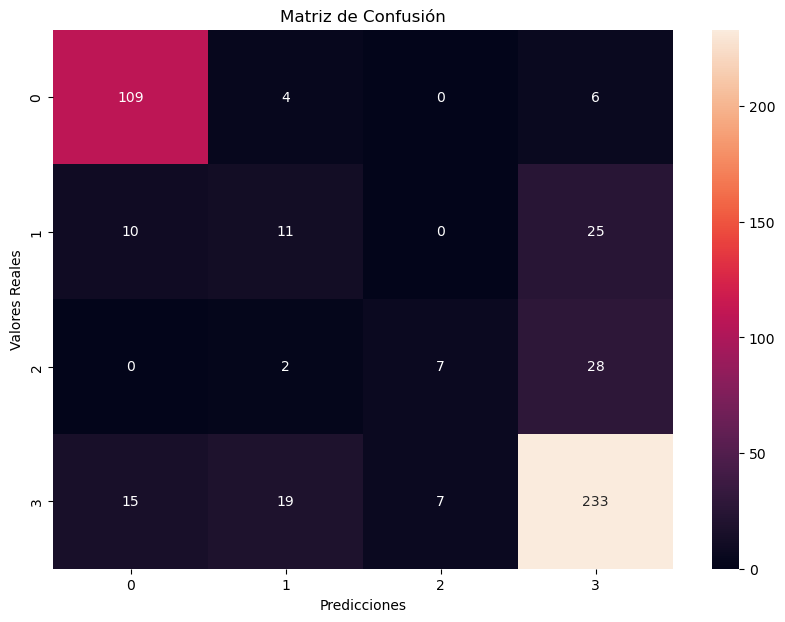

              precision    recall  f1-score   support

       heavy       0.81      0.92      0.86       119
        high       0.31      0.24      0.27        46
         low       0.50      0.19      0.27        37
      normal       0.80      0.85      0.82       274

    accuracy                           0.76       476
   macro avg       0.60      0.55      0.56       476
weighted avg       0.73      0.76      0.74       476



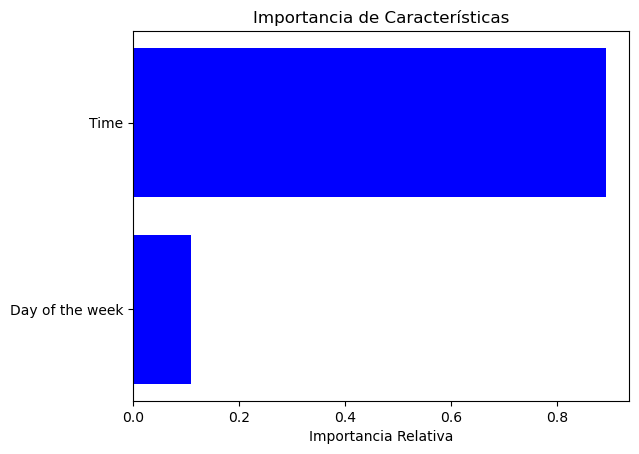

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Función para convertir la columna de tiempo a horas del día
def convert_time_to_hour(data):
    return data['Time'].apply(lambda x: datetime.strptime(x, '%I:%M:%S %p').hour)

# Función para codificar variables categóricas
def encode_categorical(data, column):
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])
    return data, encoder

# Carga de los datos de entrenamiento
train_data = pd.read_csv('C:\\KOPURU\\DATOS\\train\\train_datos-trafico.csv')

# Preprocesamiento de los datos de entrenamiento
train_data['Time'] = convert_time_to_hour(train_data)
train_data, day_encoder = encode_categorical(train_data, 'Day of the week')

# Escalado de datos numéricos
scaler = StandardScaler()
numerical_columns = ['Time', 'Day of the week']
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

# Separación de características y etiquetas
X = train_data.drop(['Traffic Situation', 'Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total'], axis=1)
y = train_data['Traffic Situation']

# Validación cruzada
modelo_rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(modelo_rf, X, y, cv=5)
print("Precisión media en la validación cruzada:", scores.mean())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de bosque aleatorio
modelo_rf.fit(X_train, y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred_test = modelo_rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Precisión en el conjunto de prueba:", accuracy_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# Informe de clasificación
report = classification_report(y_test, y_pred_test)
print(report)

# Importancia de características
importances = modelo_rf.feature_importances_
indices = np.argsort(importances)
plt.title('Importancia de Características')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

In [31]:
# El resto de tu código...

# Función para realizar predicciones basadas en la entrada del usuario
def predecir_trafico(hora, dia_semana):
    # Crear un DataFrame con todas las características necesarias
    data_usuario = pd.DataFrame({ 
        'Time': [hora], 
        'Day of the week': [dia_semana]
    })
    
    # Procesar la entrada del usuario
    data_usuario['Time'] = convert_time_to_hour(data_usuario)
    data_usuario['Day of the week'] = day_encoder.transform(data_usuario['Day of the week'])
    data_usuario[numerical_columns] = scaler.transform(data_usuario[numerical_columns])

    # Hacer la predicción
    prediccion = modelo_rf.predict(data_usuario)
    probabilidad = modelo_rf.predict_proba(data_usuario).max()

    return prediccion, probabilidad

# Ejemplo de uso
hora = '5:00:00 PM'
dia_semana = 'Saturday'


# Realizar la predicción
prediccion, fiabilidad = predecir_trafico(hora, dia_semana)

# Mostrar la predicción y la fiabilidad
print(f"Predicción de Tráfico: {prediccion[0]}")
print(f"Fiabilidad de la Predicción: {fiabilidad:.2f}")


Predicción de Tráfico: heavy
Fiabilidad de la Predicción: 0.93
